Data saved to loan_payments_data.csv successfully.
Data Shape: (54231, 43)
Sample of the Data:
         id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date 

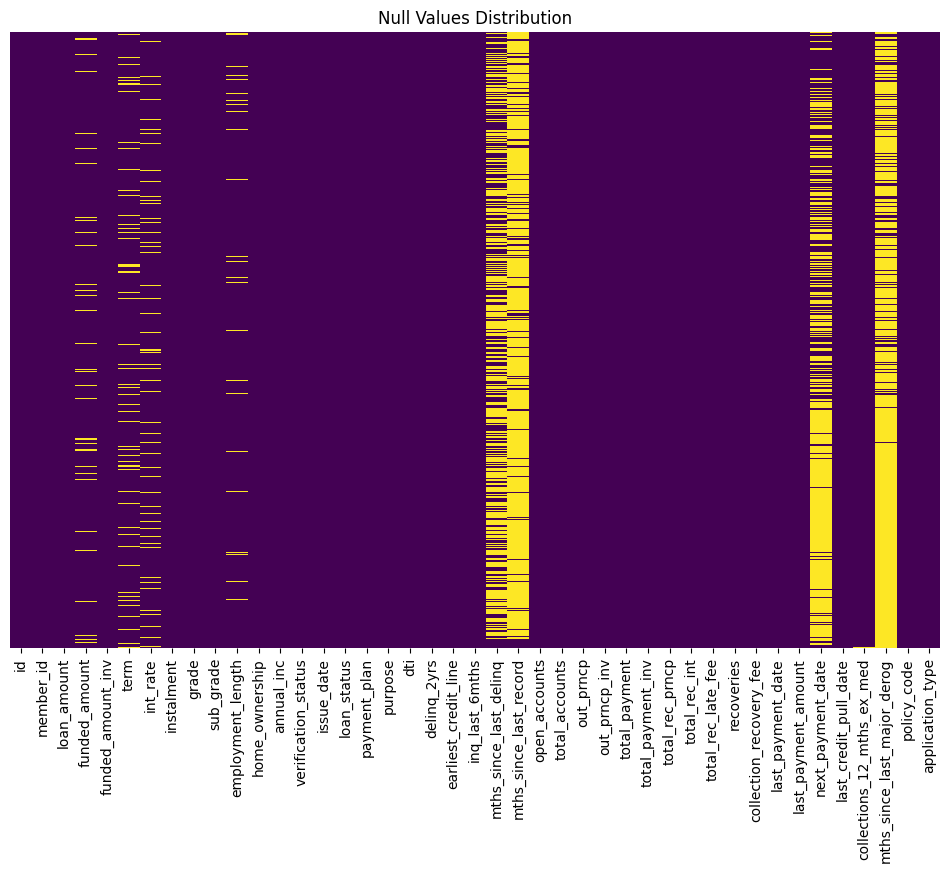

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: '36 months'

In [2]:
# main_script.ipynb
from db_utils import RDSDatabaseConnector, LocalDataLoader, DataFrameInfo,Plotter,DataFrameTransform
from main_script import DataTransform
import pandas as pd

# Load credentials from the RDS database
rds_connector = RDSDatabaseConnector()
credentials = rds_connector.load_database_credentials()

# Extract data from the RDS database
query = "SELECT * FROM loan_payments"
data_df = rds_connector.extract_data_as_dataframe(query)

# Save data to a local CSV file
file_path = "loan_payments_data.csv"
rds_connector.save_data_to_csv(data_df, file_path)

# Load data from local CSV file into Pandas DataFrame
loaded_data = LocalDataLoader.load_data_from_csv(file_path)

# Print the shape of the data
print("Data Shape:", loaded_data.shape)

# Display a sample of the data
print("Sample of the Data:")
print(loaded_data.head())

# Print information about each column
print("\nColumn Information:")
print(loaded_data.info())

# Display the first 5 values of each column
print("\nFirst 5 Values of Each Column:")
for column in loaded_data.columns:
    print(f"{column}: {loaded_data[column].head().tolist()}")

# Apply transformations using DataTransform
transformer = DataTransform()
numeric_columns = ['loan_amount', 'funded_amount', 'annual_inc', 'dti']
date_columns = ['issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']
loaded_data = transformer.convert_to_numeric(loaded_data, numeric_columns)
loaded_data = transformer.convert_to_datetime(loaded_data, date_columns)


# Load your DataFrame

df = pd.read_csv("loan_payments_data.csv")

# Create an instance of DataFrameInfo
df_info = DataFrameInfo()

# Example usage
df_info.describe_columns(df)
df_info.extract_statistics(df)
df_info.count_distinct_values(df)
df_info.print_shape(df)
df_info.count_null_values(df)

# Instantiate the classes
plotter = Plotter()
transformer = DataFrameTransform()

# Assuming you have loaded your DataFrame 'df' before this point
# Plot NULL distribution
plotter.plot_null_distribution(df)

# Drop columns with a high percentage of NULLs
df = transformer.drop_columns_with_nulls(df)

# Impute missing values
df = transformer.impute_missing_values(df)

# Plot NULL distribution after imputation
plotter.plot_null_distribution(df)
